In [1]:
# Importing packages thats being used
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv('/Users/joeloscarsson/Documents/www/Machine-Learning/Projects/data3/movies1.csv')
ratings = pd.read_csv('/Users/joeloscarsson/Documents/www/Machine-Learning/Projects/data3/ratings1.csv')

# # Converting to the datatypes i want to use. 
# df_movies = pd.read_csv(movies, usecols=['movieId', 'title'], dtype={'movieId': 'int32', 'title': 'str'})
# df_ratings = pd.read_csv(ratings, usecols=['userId', 'movieId', 'rating'], dtype={'userId': 'int32', 'movieId': 'int32', 'rating':'float32'})

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# Checking datatypes and entries
print(movies.info())

# We have 58098 Movies in this dataset
print(movies.describe())

# We have zero NaN values... for now...
print(movies.isnull().sum().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  58098 non-null  int64 
 1   title    58098 non-null  object
 2   genres   58098 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB
None
             movieId
count   58098.000000
mean   111919.516197
std     59862.660956
min         1.000000
25%     72437.750000
50%    126549.000000
75%    161449.500000
max    193886.000000
0


In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [6]:
# Checking datatypes and entries
print(ratings.info())


print(ratings.head())

# Investigating what kind of values we have in the rating
# Can see that we have from 0.5-5.0, i want to avoid diluting this list 
print(ratings.value_counts(['rating']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 847.0 MB
None
   userId  movieId  rating   timestamp
0       1      307     3.5  1256677221
1       1      481     3.5  1256677456
2       1     1091     1.5  1256677471
3       1     1257     4.5  1256677460
4       1     1449     4.5  1256677264
rating
4.0       7394710
3.0       5515668
5.0       4071135
3.5       3404360
4.5       2373550
2.0       1850627
2.5       1373419
1.0        886233
0.5        442388
1.5        441354
dtype: int64


In [7]:
# So we have zero NaN values in the entire df of ratings, for now...
print(ratings.isnull().sum().sum())

0


In [8]:
print(ratings.head())

   userId  movieId  rating   timestamp
0       1      307     3.5  1256677221
1       1      481     3.5  1256677456
2       1     1091     1.5  1256677471
3       1     1257     4.5  1256677460
4       1     1449     4.5  1256677264


In [9]:
print(movies.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [10]:
df_merged = pd.merge(ratings, movies)
df_merged

,userId,movieId,rating,timestamp,title,genres
0,1,307,3.5,1256677221,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
1,6,307,4.0,832059248,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
2,56,307,4.0,1383625728,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
3,71,307,5.0,1257795414,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
4,84,307,3.0,999055519,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
...,...,...,...,...,...,...
27753439,282403,167894,1.0,1524243885,Stranglehold (1994),Action
27753440,282732,161572,3.5,1504408070,The Great Houdini (1976),Drama
27753441,283000,117857,3.5,1417317969,Hotline (2014),Documentary
27753442,283000,133409,3.5,1431539331,Barnum! (1986),(no genres listed)


Vilka är de 10 filmerna med flest ratings?



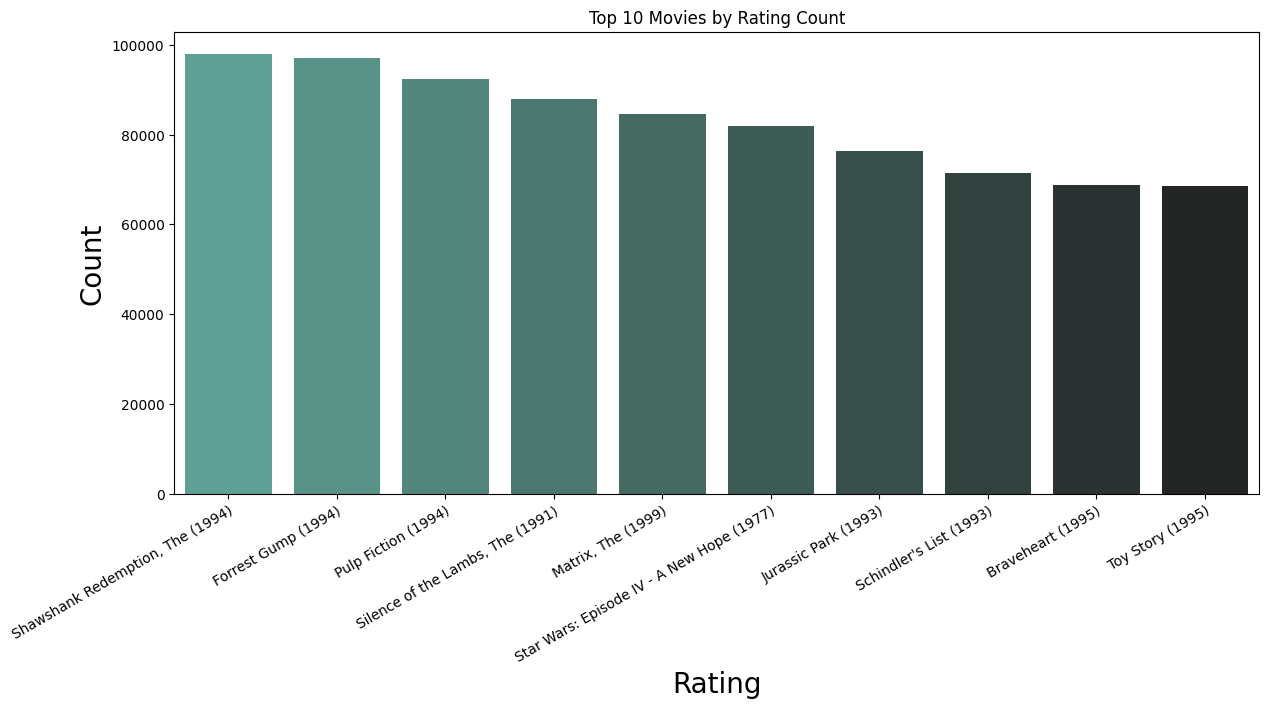

In [11]:
# Making a new df for only rating to save speed.
df_cleaned_list = df_merged.drop(["timestamp", "genres"], axis=1)

def movie_ratings(df_cleaned_list, title):
    # get the top 10 movies with the most ratings
    df_top10_most_ratings = df_cleaned_list.groupby('title')['userId'].count().nlargest(10)
    
    # get the count of ratings for each rating level for the top 10 movies
    df_top10_ratings = df_cleaned_list[df_cleaned_list['title'].isin(df_top10_most_ratings.index)].groupby('rating')['userId'].count()
    
    # get the count of ratings for the specified movie
    unique_movie_counts = df_cleaned_list[df_cleaned_list['title'] == title]['title'].value_counts().values[0]
    return df_top10_most_ratings, unique_movie_counts

# call the movie_ratings function with the dataframe and the title of the movie
df_top10_ratings, unique_movie_counts = movie_ratings(df_cleaned_list, "Shawshank Redemption, The (1994)")

# print("Top 10 movies with the most ratings by rating level:\n", df_top10_ratings)

# create a barplot of the top 10 movies by rating count
plt.figure(figsize=(14, 6))
sns.barplot(x=df_top10_ratings.index, y=df_top10_ratings.values, palette="dark:#5A9_r")
plt.title('Top 10 Movies by Rating Count')
plt.xlabel('Rating', size = 20)
plt.ylabel('Count', size = 20)
plt.xticks(rotation=30, rotation_mode="anchor", ha="right")


plt.show()

In [16]:

df_cleaned_list

def calculate_mean_ratings(df_cleaned_list, movie_list):
    # filter the dataframe to include only the movies in the movie_list
    df_movies = df_cleaned_list[df_cleaned_list['title'].isin(movie_list)]
    
    # calculate the mean rating for each movie
    df_mean_ratings = df_movies.groupby('title')['rating'].mean()
    
    # # sort the mean ratings in descending order
    # df_mean_ratings = df_mean_ratings.sort_values(ascending=True)
    
    return df_mean_ratings, df_movies


# sort the mean ratings in descending order why isn't it taking the function?
df_mean_ratings_sorted = df_mean_ratings.sort_values(ascending=True)

color = '#5A9'

# create a horizontal bar plot of the mean ratings
plt.barh(df_mean_ratings_sorted.index, df_mean_ratings_sorted.values, color=color)

# set the title and labels for the plot
plt.title('Mean Ratings for Top 10 Movies')
plt.xlabel('Mean Rating')
plt.ylabel('Movie Title')

# display the plot
plt.show()

NameError: name 'df_mean_ratings' is not defined

In [17]:
# TODO: Calculate the mean rating for the top10 with THE MOST ratings, and plot

df_cleaned_list = df_merged.drop(["timestamp", "genres"], axis=1)

df_mean_ratings = df_cleaned_list[df_cleaned_list['title'].isin(df_top10_ratings.index)].groupby('title')['rating'].mean()
df_mean_ratings.sort_values(ascending=False)

title
Shawshank Redemption, The (1994)             4.424188
Schindler's List (1993)                      4.257502
Pulp Fiction (1994)                          4.173971
Silence of the Lambs, The (1991)             4.151412
Matrix, The (1999)                           4.149695
Star Wars: Episode IV - A New Hope (1977)    4.120455
Forrest Gump (1994)                          4.056585
Braveheart (1995)                            4.008481
Toy Story (1995)                             3.886649
Jurassic Park (1993)                         3.665034
Name: rating, dtype: float64

# TODO: Do a plot over the years and how many movies that was created that year, to represent the dataset

In [18]:
df_cleaned_list.head()

,userId,movieId,rating,title
0,1,307,3.5,Three Colors: Blue (Trois couleurs: Bleu) (1993)
1,6,307,4.0,Three Colors: Blue (Trois couleurs: Bleu) (1993)
2,56,307,4.0,Three Colors: Blue (Trois couleurs: Bleu) (1993)
3,71,307,5.0,Three Colors: Blue (Trois couleurs: Bleu) (1993)
4,84,307,3.0,Three Colors: Blue (Trois couleurs: Bleu) (1993)


In [19]:
# TODO: Do a plot over the combined rating against movield

# create a scatter plot of the combined rating against movieId
plt.scatter(df_cleaned_list['movieId'], df_cleaned_list['rating'])

# set the title and labels for the plot
plt.title('Combined Rating vs. Movie ID')
plt.xlabel('Movie ID')
plt.ylabel('Combined Rating')

# display the plot
plt.show()

In [ ]:
# TODO: Plot how many NaN values there is in the dataset DONE
# TODO: Plot top10 movies with best ratings DONE
# TODO: Calculate the mean rating for the top10 with THE MOST ratings, and plot DONE


# TODO: Do a plot over the years and how many movies that was created that year, to represent the dataset
# TODO: Do a plot over the combined rating against movield
       # Want 


# TODO: Calculate the mean ratings for the top10 movies with the most ratings, make a stapel diagram from this

# TODO: There is a logical error in the video guide. (Might have something to do with the quote below)
       # "Hi, while you are trying not to present the recommendation of 'toy story' itself, by adding: print(df_movies['title'][i].where(i!=idx))
        # you still have that in the first line as NaN"

       # Maybe it is because in df_movies movield the toy story has index 0? Somehow it can mess with
       # everything since we fillna 0 values to rating